<a href="https://colab.research.google.com/github/adcaceres69/Proyecto-DENGUE/blob/main/Desafio_CrossValidation_ARMANDO_CACERES_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import mean_absolute_percentage_error

# me importa todas las metricas (?)
from sklearn import metrics


In [89]:
# 1. Preparación de Datos:
# leyendo los datos
features = pd.read_csv('/dengue_features_train.csv')
labels = pd.read_csv('/dengue_labels_train.csv')

# Unimos los datos en base a 'city', 'year' y 'weekofyear'
data = pd.merge(features, labels, on=['city', 'year', 'weekofyear'])

In [90]:
#data = data.iloc[:, 2:]

In [91]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [92]:
col_a_inter = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm',
                'reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
                'reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k',
                'station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c',
                'station_min_temp_c','station_precip_mm']

* La función interpolate de pandas permite rellenar los valores nulos en una columna basándose en los valores existentes. Es útil para datos que tienen una tendencia temporal

In [93]:
for column in col_a_inter:
    data[column].interpolate(method='linear', inplace=True)

In [94]:
# Codificación One-Hot para la variable categórica 'city'
encoder = OneHotEncoder()
city_encoded = encoder.fit_transform(data['city'].values.reshape(-1, 1))
city_df = pd.DataFrame(city_encoded.toarray(), columns=encoder.get_feature_names_out(['city']))
data = pd.concat([data, city_df], axis=1)
data.drop('city', axis=1, inplace=True)

# Eliminamos la columna 'week_start_date' por ser de tipo fecha (adáptalo según tus necesidades)
data.drop('week_start_date', axis=1, inplace=True)

# cuando quite estas columnas empeoraron las metricas
# quito tambien estas 2 columnas para ver la diferencia
#data.drop('year', axis=1, inplace=True)
#data.drop('weekofyear', axis=1, inplace=True)
######

# Dividimos los datos en conjuntos de entrenamiento y prueba
X = data.drop('total_cases', axis=1)
y = data['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1456 non-null   int64  
 1   weekofyear                             1456 non-null   int64  
 2   ndvi_ne                                1456 non-null   float64
 3   ndvi_nw                                1456 non-null   float64
 4   ndvi_se                                1456 non-null   float64
 5   ndvi_sw                                1456 non-null   float64
 6   precipitation_amt_mm                   1456 non-null   float64
 7   reanalysis_air_temp_k                  1456 non-null   float64
 8   reanalysis_avg_temp_k                  1456 non-null   float64
 9   reanalysis_dew_point_temp_k            1456 non-null   float64
 10  reanalysis_max_air_temp_k              1456 non-null   float64
 11  rean

In [96]:
X.isna().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
city_iq                                  0
city_sj    

In [97]:
data.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.0,1.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.0,1.0
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.0,1.0
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.0,1.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.0,1.0


In [98]:
#(data[data.columns[2:23]]).head() # sin las 2 primeras ni las 2 ultimas

In [99]:
# 2. Construcción del Modelo:

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [100]:
# 3. Evaluación del Modelo:

# Error Absoluto medio:
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio: {mae}\n")

# Error cuadrático medio:
mse = mean_squared_error(y_test, y_pred)#, squared=False) - esto te devuelve la raiz el error cuadrado medio
print(f"Error cuadrático medio: {mse}\n")
mse2 = mean_squared_error(y_test, y_pred, squared=False)
print(f"Raiz del Error cuadrático medio: {mse2}\n")

# Coeficiente de determinacion:
r2 = r2_score(y_test,  y_pred)
print(f"Coeficiente de Determinación R^2: {r2}\n")

# Raiz del Error cuadrado medio:
#rmse = np.sqrt(mse)
#print(f"Raíz del Error cuadrado medio: {rmse}\n")

# error absoluto medio en porcentaje
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Error absoluto medio en porcentaje: {mape}\n")

Error Absoluto Medio: 12.811556064073226

Error cuadrático medio: 795.1693320366134

Raiz del Error cuadrático medio: 28.198746994088467

Coeficiente de Determinación R^2: 0.6775028608722651

Error absoluto medio en porcentaje: 1356232748196699.5



* Error Absoluto Medio (Mean Absolute Error, MAE): Representa el error promedio entre las predicciones del modelo y los valores reales. Un MAE de 13.72, como en tu ejemplo, indica que, en promedio, tus predicciones se desvían del valor real en 13.72 unidades. Es una métrica fácil de interpretar porque tiene las mismas unidades que la variable objetivo. Cuanto más cercano a 0 esté el MAE, mejor será el modelo.

* Error Cuadrático Medio (Mean Squared Error, MSE): Es el promedio de los errores cuadrados entre las predicciones y los valores reales. Da más peso a los errores grandes, lo que puede ser útil si consideras que los errores grandes son más problemáticos que los pequeños. En tu caso, un MSE de 914.93 sugiere que los errores pueden ser significativos, pero su interpretación directa no es tan intuitiva como el MAE porque está en unidades cuadradas. La raíz cuadrada del MSE (RMSE) es una métrica relacionada que podría ser más interpretable ya que está en las mismas unidades que la variable objetivo.

* Raíz del Error Cuadrado Medio (Root Mean Squared Error, RMSE): Es la raíz de la media de los errores cuadrados entre las predicciones y los valores reales. Un RMSE de 28.98.

* Coeficiente de Determinación R^2: Es una métrica que indica cuánta variación de la variable objetivo es explicada por el modelo. Varía entre 0 y 1, donde un valor más alto indica que el modelo explica una mayor proporción de la variación. Un R^2 de 0.6289 (o 62.89%) sugiere que tu modelo explica aproximadamente el 62.89% de la variación en tus datos, lo cual puede considerarse como una buena señal, dependiendo del contexto y de la naturaleza de los datos. Sin embargo, hay que tener cuidado al interpretar R^2 ya que un modelo más complejo (con más características) podría inflar artificialmente este valor.

Al interpretar estas métricas, es importante considerarlas en conjunto y también en el contexto de tu problema específico. Por ejemplo, dependiendo de la aplicación, un MAE de 13.72 podría ser aceptable o no. Además, es útil comparar estas métricas con las de otros modelos para determinar cuál tiene un rendimiento superior.

### -------------------------------------------------------------------

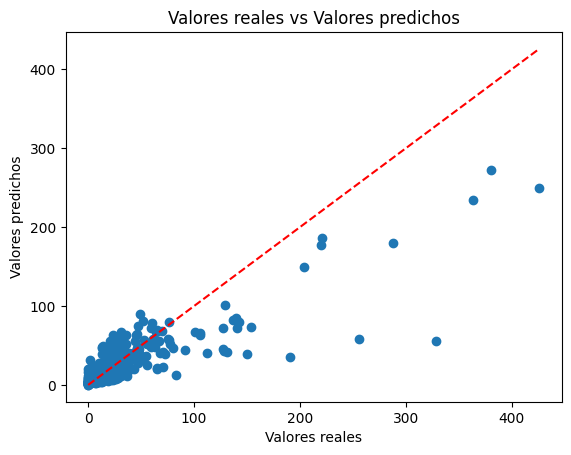

In [101]:
# Valores reales vs Valores predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')

# Línea de referencia perfecta (predicción perfecta)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

* "analizando" los valores de feature_importance

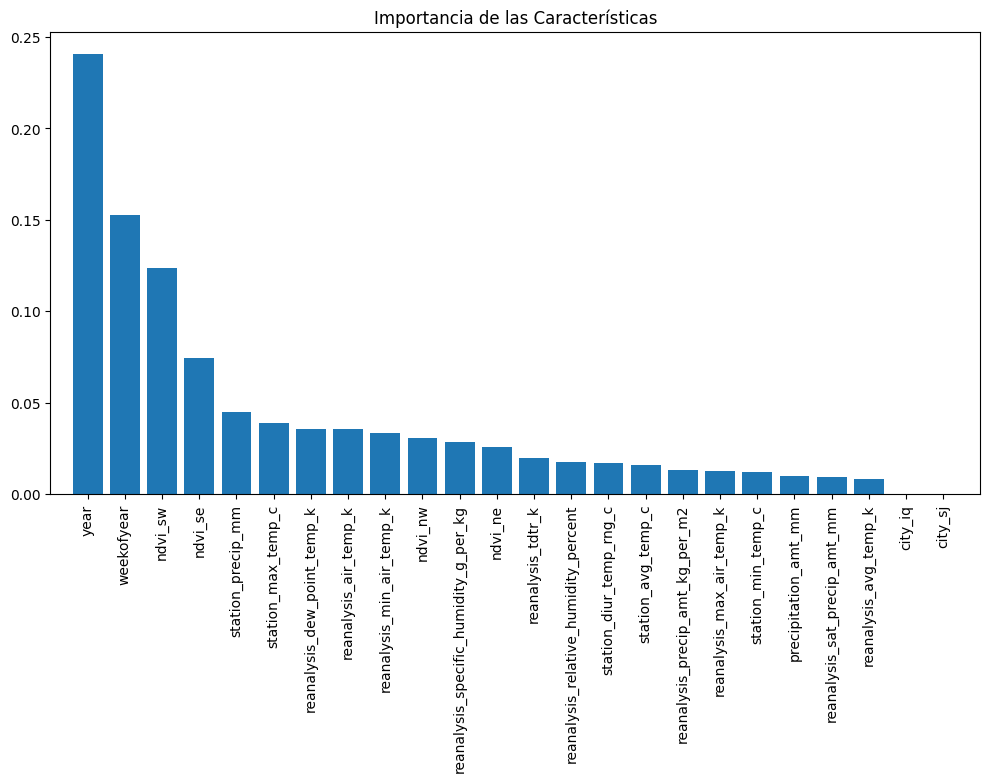

In [102]:
# Interpretación del Modelo - features_importance:
feature_names = X_train.columns
importances = model.feature_importances_

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

* aqui deberia hacer lo que dijo el Profe en la Clase 44, de ir eliminando las variables que no son relevantes y volver a correr el modelo y repetir la eliminación...(28/10/23)

* ~podria ademas correr el ForestRegressor sin las columnas de years y weekofyear---- (28/10/23~) -- EMPEORARON LAS METRICAS

## CROSS-VALIDATION RFR

In [103]:
from sklearn.model_selection import cross_val_score

# Instancia del modelo
forest = RandomForestRegressor(n_estimators=100)

# Validación cruzada
forest_scores = cross_val_score(forest, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertimos a RMSE (Root Mean Squared Error)
forest_rmse_scores = np.sqrt(-forest_scores)

# Mostramos resultados
print("Puntuaciones para RandomForestRegressor:", forest_rmse_scores)
print("Media:", forest_rmse_scores.mean())
print("Desviación estándar:", forest_rmse_scores.std())

Puntuaciones para RandomForestRegressor: [77.47350694 41.08330887 28.84486804 24.09824816 13.0995867 ]
Media: 36.919903744830115
Desviación estándar: 22.176281166775617


## desde Aqui el modelo de SVR

In [104]:
# 1. Preparación de Datos:

# Suponiendo que tus datos están en "features.csv" y "labels.csv"
features = pd.read_csv('/dengue_features_train.csv')
labels = pd.read_csv('/dengue_labels_train.csv')

# Unimos los datos en base a 'city', 'year' y 'weekofyear'
data = pd.merge(features, labels, on=['city', 'year', 'weekofyear'])

In [105]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [106]:
col_a_inter = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm',
                'reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
                'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
                'reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
                'reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k',
                'station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c',
                'station_min_temp_c','station_precip_mm']

In [107]:
for column in col_a_inter:
    data[column].interpolate(method='linear', inplace=True)

In [108]:
# Codificación One-Hot para la variable categórica 'city'
encoder = OneHotEncoder()
city_encoded = encoder.fit_transform(data['city'].values.reshape(-1, 1))
city_df = pd.DataFrame(city_encoded.toarray(), columns=encoder.get_feature_names_out(['city']))
data = pd.concat([data, city_df], axis=1)
data.drop('city', axis=1, inplace=True)

# Eliminamos la columna 'week_start_date' por ser de tipo fecha (adáptalo según tus necesidades)
data.drop('week_start_date', axis=1, inplace=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X = data.drop('total_cases', axis=1)
y = data['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las características para el SVR
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [109]:
X.isna().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
city_iq                                  0
city_sj    

In [110]:
# 2. Construcción del Modelo:

model_svr = SVR(C=1.0, epsilon=0.1, kernel='rbf') #kernel='poly', degree=3
model_svr.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model_svr.predict(X_test_scaled)
#
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
#
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [111]:
# 3. Evaluación del Modelo:

# Error Absoluto medio:
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio: {mae}\n")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}\n")

#Coeficiente de determinacion:
r2 = r2_score(y_test,  y_pred)
print(f"Coeficiente de Determinación R^2: {r2}")

Error Absoluto Medio: 17.517037829628734

Error cuadrático medio: 2051.4094539128473

Coeficiente de Determinación R^2: 0.16800905994193915


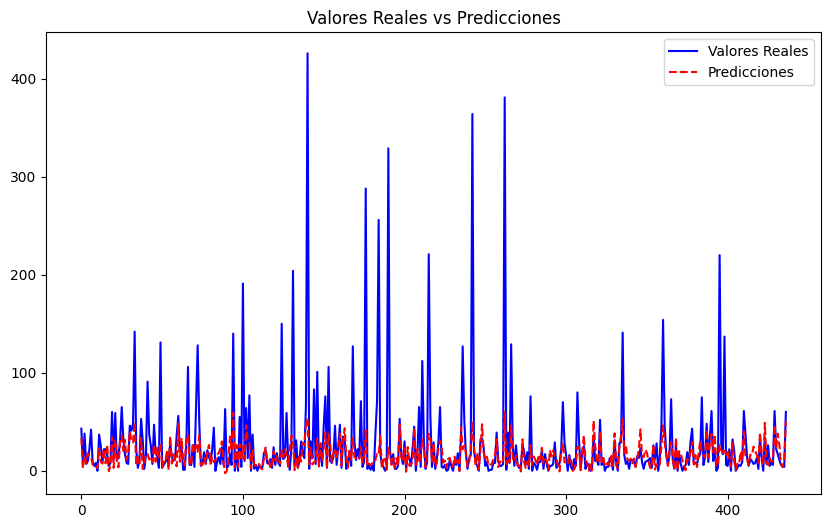

In [112]:
# Valores reales vs predicciones:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reales", color="blue")
plt.plot(y_pred, label="Predicciones", color="red", linestyle="--")
plt.legend()
plt.title("Valores Reales vs Predicciones")
plt.show()

### ver de AJUSTAR HIPERPARAMETROS de AMBOS MODELOS y PROBAR lo DADO en las ultimas CLASES.... 27/10/23

en el archivo "DESAFIO_FeaturesSelection_CACERES_v241023" realice ajustes y pruebas de hipérametros para el modelo SVR
* El mejor kernel es: poly con un R2 de: -0.05163664202881457
* El mejor grado para el kernel polinómico es: 3 con un MSE de: 3375.880647626891

## CROSS-VALIDATION SVR

In [113]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Instancia del modelo con escalado
svr_pipeline = make_pipeline(StandardScaler(), SVR())

# Validación cruzada
svr_scores = cross_val_score(svr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertimos a RMSE
svr_rmse_scores = np.sqrt(-svr_scores)

# Mostramos resultados
print("Puntuaciones para SVR:", svr_rmse_scores)
print("Media:", svr_rmse_scores.mean())
print("Desviación estándar:", svr_rmse_scores.std())

Puntuaciones para SVR: [80.97060424 42.57833379 20.70321029 19.59176035 13.09022044]
Media: 35.38682582142737
Desviación estándar: 24.86696568483013


## Mostramos los resultados del Cross Validation para los modelos SVR y RandomForestRegressor

# RFR
* Puntuaciones para RandomForestRegressor: [77.13803397 41.08119662 30.50099024 22.95638555 13.12343365]
* Media: 36.96000800398701
* Desviación estándar: 22.078317849820266

# SVR
* Puntuaciones para SVR: [80.97060424 42.57833379 20.70321029 19.59176035 13.09022044]
* Media: 35.38682582142737
* Desviación estándar: 24.86696568483013

### Graficamos los reultados del Cross Validation para los modelos

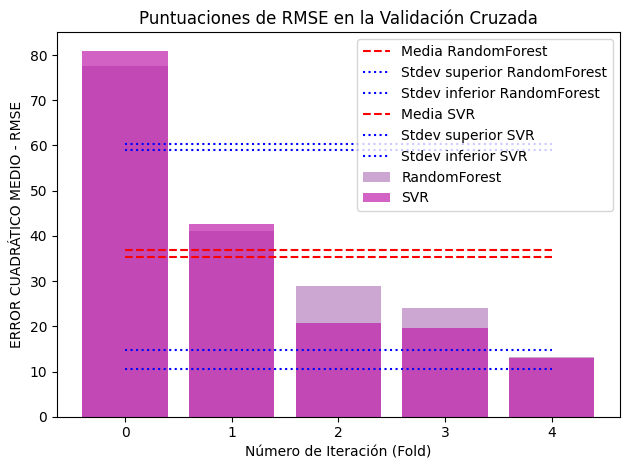

In [114]:
def plot_scores(scores, label):
    plt.bar(range(len(scores)), scores, alpha=0.7, label=label, color=np.random.rand(3,))
    plt.hlines(np.mean(scores), xmin=0, xmax=len(scores)-1, colors='r', linestyles='dashed', label=f'Media {label}')
    plt.hlines(np.mean(scores) + np.std(scores), xmin=0, xmax=len(scores)-1, colors='b', linestyles='dotted', label=f'Stdev superior {label}')
    plt.hlines(np.mean(scores) - np.std(scores), xmin=0, xmax=len(scores)-1, colors='b', linestyles='dotted', label=f'Stdev inferior {label}')

# Dibuja los resultados de RandomForestRegressor
plot_scores(forest_rmse_scores, "RandomForest")

# Dibuja los resultados de SVR
plot_scores(svr_rmse_scores, "SVR")

# Configuraciones adicionales para el gráfico
plt.title("Puntuaciones de RMSE en la Validación Cruzada")
plt.xlabel("Número de Iteración (Fold)")
plt.ylabel("ERROR CUADRÁTICO MEDIO - RMSE")
plt.legend()
plt.tight_layout()
plt.show()

* El gráfico de barras muestra las puntuaciones de RMSE para cada modelo en cada fold. Las líneas discontinuas representan la media de las puntuaciones, y las líneas punteadas representan una desviación estándar por encima y por debajo de la media.





